In [4]:
# find the nth fib number
# use O(n) times and space

FIBS = {0:0,1:1}
def fibonaci(n):
    if n in FIBS:
        return FIBS[n]
    
    FIBS[n] = fibonaci(n-1) + fibonaci(n-2)
    return FIBS[n]

In [10]:
fibonaci(1)

1

In [ ]:
Impliment binary search
given list of ints already sorted lowest to greatest, no repeats
given number - perform binary search
return position of number or return None if not found

In [14]:
# array = sorted array
# n_min is lower bound
# n_max is upper bound (not inclusive)
# num is the number to find
def BinarySearch(array, num, n_min=0, n_max = None):
    if n_max is None:
        n_max = len(array)
    
    if n_min == n_max:
        return None
    elif n_min == n_max-1:
        if num == array[n_min]:
            return n_min
        else:
            return None
    
    mid = (n_min+n_max)//2

    if array[mid] < num:
        return BinarySearch(array, num, n_min = mid, n_max=n_max)
    elif array[mid] == num:
        return mid
    else:
        return BinarySearch(array, num, n_min = n_min, n_max=mid)

In [16]:
test_list = [1,2,3,3.5,4,5,10]
num = 3.5
print(BinarySearch(test_list,num))

3


In [6]:
from sys import getsizeof
x = 1
print(type(x),x,getsizeof(x))
y = 2**1000
print(type(y),y,getsizeof(y))

<class 'int'> 1 28
<class 'int'> 10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376 160


In [1]:
# Code Challenge Practice Interview Question
# Question
# You have an array of minutely stock prices for GOOG in order.
# That is, S[0] is the first price and S[n] is the last price. 
# What is the maximum amount of money that you can make from first buying a single share 
# and then selling it (once) during the day?

# The solution should be  𝑂(𝑛) . Keep track of the min_price and max_profit.
def max_price(S):
    min_price = S[0]
    max_profit = 0

    for time in range(len(S)):
        current_price = S[time]
        min_price = min(min_price, current_price)
        max_profit = max(max_profit, current_price - min_price)
    return max_profit

In [2]:
assert max_price([0,0,0,0,0,0,0,0,0,0]) == 0
assert max_price([10]) == 0
assert max_price([10,9,8,7,6,5,4,3,2]) == 0
assert max_price([1,4,10,2,34,1]) == 33
assert max_price([15, 10, 12, 11, 100, 1, 10]) == 90
# What is the time complexity?

In [55]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng()

def random_followers(beta = 10):
    count = int(rng.exponential(scale = beta))+1
    
    return [x for x in np.random.randint(0,10**10,count)]

N = 10
edges = [(0,i) for i in range(1,12)]
edges.append((13,0))
edges.append((3,0))

#edges = []
#for i in range(N):
#    edges.extend([(i,x) for x in random_followers()])

G = nx.DiGraph(edges)

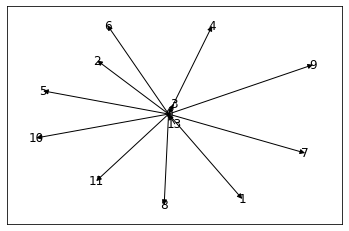

In [56]:
nx.draw_networkx(G, with_labels = True, node_size = 0)

In [58]:
min(nx.degree(G),key = lambda x: x[1])

for x in nx.all_neighbors(G,0):
    print(x)

13
3
1
2
3
4
5
6
7
8
9
10
11


In [1]:
from requests_oauthlib import OAuth1
import requests
import simplejson as json

with open("twitter_secrets.json.nogit") as fh:
    secrets = json.loads(fh.read())

# create an auth object
auth = OAuth1(
    secrets["api_key"],
    secrets["api_secret"],
    secrets["access_token"],
    secrets["access_token_secret"]
)

def get_id(screen_name):
    user_id = requests.get(
        'https://api.twitter.com/2/users/by/username/' + screen_name,
        auth=auth
    )
    while user_id.status_code == 429:
        time.sleep(60)
        user_id = requests.get(
            'https://api.twitter.com/2/users/by/username/' + screen_name,
            auth=auth
        )
    return user_id.json()['data']['id']

user_id = '176774540'
#user_id = get_id('MDWoolls')
response = requests.get(
    'https://api.twitter.com/2/users/' + user_id,
    auth=auth,
    params = {'user.fields':'location','user.fields':'public_metrics'}
)
print(response)
response = response.json()

print(response)

<Response [200]>
{'data': {'name': 'CGP Grey 🐝', 'id': '176774540', 'public_metrics': {'followers_count': 249507, 'following_count': 192, 'tweet_count': 213, 'listed_count': 1922}, 'username': 'cgpgrey'}}


In [10]:
#from bokeh.plotting import figure, output_file, show, output_notebook
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import Label, LabelSet, ColumnDataSource, Range1d
from collections import defaultdict
output_notebook()

def average_data(raw_data, n_a):
    raw_data.sort()

    # data_average = {'p':[],'p_min':[],'p_max':[],'size':[],'size_error':[]}
    data_average = defaultdict(lambda: [])
    i = 0
    while i + n_a <= len(raw_data):
        p_min = raw_data[i][0]
        p_max = raw_data[i+n_a-1][0]
        data_average['p_min'].append(p_min)
        data_average['p_max'].append(p_max)
        data_average['p'].append((p_min+p_max) / 2)
        y_vals = [x[1] for x in raw_data[i:i + n_a]]
        data_average['size'].append(np.mean(y_vals))
        data_average['size_error'].append(np.std(y_vals)/np.sqrt(len(y_vals)))
        data_average['size_min'].append(min(y_vals))
        data_average['size_max'].append(max(y_vals))
        i += n_a
        
    if i + 1 < len(raw_data):
        p_min = raw_data[i][0]
        p_max = raw_data[-1][0]
        data_average['p_min'].append(p_min)
        data_average['p_max'].append(p_max)
        data_average['p'].append((p_min+p_max) / 2)
        y_vals = [x[1] for x in raw_data[i:]]
        data_average['size'].append(np.mean(y_vals))
        data_average['size_error'].append(np.std(y_vals)/np.sqrt(len(y_vals)))
        data_average['size_min'].append(min(y_vals))
        data_average['size_max'].append(max(y_vals))
        
    return pd.DataFrame(data_average, dtype = float)

screen_name = 'BradyHaran'
   
save_file = f'{screen_name}_network.txt'

with open(save_file, 'rb') as fp:
    raw_data = pickle.load(fp)
    
print(len(raw_data))

Loading BokehJS ...

9316


In [27]:
n_a = max(len(raw_data)//100, 100)
print(n_a)
data = average_data(raw_data,n_a)
print(len(data))
print(data)

100
94
       p_min     p_max         p   size  size_error  size_min  size_max
0   0.000000  0.001786  0.000893   2.29    0.121074       1.0       5.0
1   0.001816  0.006067  0.003942   4.24    0.107815       2.0       7.0
2   0.006123  0.009208  0.007666   4.48    0.119566       2.0       7.0
3   0.009214  0.012848  0.011031   4.82    0.116086       2.0       7.0
4   0.013008  0.016526  0.014767   5.58    0.127421       2.0       9.0
..       ...       ...       ...    ...         ...       ...       ...
89  0.089229  0.091258  0.090244  27.50    1.495894       7.0      94.0
90  0.091325  0.099694  0.095510  16.31    0.405387       7.0      19.0
91  0.099788  0.106238  0.103013  18.85    0.536167       7.0      25.0
92  0.106305  0.131174  0.118740  17.47    0.938664       7.0      37.0
93  0.133550  0.143711  0.138631   7.00    0.000000       7.0       7.0

[94 rows x 7 columns]


In [28]:
# file to save the model
output_file(f'{screen_name}_network_bokeh.html') 

i_max = data['size'].idxmax()
row_max = data.loc[i_max]
print(row_max)

size_max = row_max['size']
p_max = row_max['p_max']

data = data.loc[:i_max]

p_min           0.061685
p_max           0.061758
p               0.061721
size          270.520000
size_error      5.261891
size_min       12.000000
size_max      282.000000
Name: 71, dtype: float64


In [29]:
from scipy.optimize import curve_fit

def fitting_function(x,pc,A,d,C):
    return C+A/(pc-x)**d

pars, cov = curve_fit(f=fitting_function,xdata = data['p'], ydata = data['size'],p0=[p_max,1,1+2/3,0],bounds = (0,np.inf))
print(pars)
print(cov)
p_c = pars[0]
dp_c = np.sqrt(np.diag(cov))[0]
print(p_c,'+/-',dp_c)

[6.77824079e-02 1.86314336e-03 2.28735967e+00 2.27958036e+00]
[[ 7.71722846e-06 -1.70832683e-05  2.34968609e-03  8.44334734e-03]
 [-1.70832683e-05  3.89814201e-05 -5.32437157e-03 -2.12300476e-02]
 [ 2.34968609e-03 -5.32437157e-03  7.28415510e-01  2.83302147e+00]
 [ 8.44334734e-03 -2.12300476e-02  2.83302147e+00  1.84721044e+01]]
0.06778240785336431 +/- 0.0027779900030249893


In [30]:
n_round = 3
p_c_string = f'{round(p_c,n_round)}+/-{round(dp_c,n_round)}'
print(p_c_string)

0.068+/-0.003


In [31]:
# plotting the line graph 
# instantiating the figure object 
graph = figure(title = f'Growth of {screen_name}\'s network', 
                   x_axis_label = 're-tweet rate',
                  y_axis_label = 'share count',
                  y_axis_type = 'log',
                  plot_width = 900,
                  x_range = [0,p_c+dp_c+10**(-n_round-1)],
                y_range = [1,max(1.5*size_max,fitting_function(p_c-dp_c/2,*pars))]
               
              ) 

graph.line(x=data['p'], y=data['size'], legend_label = f'{screen_name}: {p_c_string}')
#graph.line(x=data['p'], y=data['size_min'])
#graph.line(x=data['p'], y=data['size_max'])

x_fit = np.linspace(0,p_c,1000,endpoint = False)
graph.line(x=x_fit, y=fitting_function(x_fit,*pars), legend_label = 'fit',line_color = 'green', line_dash = 'dashed')

graph.scatter(x=data['p'], y=data['size'])

graph.line([p_c,p_c],[1,fitting_function(p_c-0.00001,*pars)],line_dash = 'dashed',line_color = 'red')
graph.line([p_c - dp_c,p_c-dp_c],[1,fitting_function(p_c-0.00001,*pars)],line_dash = 'dashed',line_color = 'blue')
graph.line([p_c+dp_c,p_c+dp_c],[1,fitting_function(p_c-0.00001,*pars)],line_dash = 'dashed',line_color = 'blue')

graph.legend.location = 'top_left'
# displaying the model
show(graph)

In [ ]:
# followers, power, user name
power_list = [(97.6*10**4, 0.01, 'BradyHaran'),
              (247*10**4, 0.009, 'cgpgrey'),
              (3.7*10**6, 0.012, 'notch'),
              (405.3*10**4, 0.007, 'mikeroweworks'),
              (26, 1.0/25,'MDWoolls')]




power_dict = ColumnDataSource(data={'count':[t[0] for t in power_list],
             'power': [t[1] for t in power_list],
             'names': [t[2] for t in power_list]})


print(power_dict)

# file to save the model
output_file(f'followers_power.html') 
TOOLS = "hover,pan,wheel_zoom,box_zoom,reset,save"
# instantiating the figure object 
graph = figure(title = f'Follower count compared to Influence power', 
               x_axis_label = 'Follower count',
              y_axis_label = 'Influence power',
              x_axis_type = 'log',tools = TOOLS,
              plot_width = 900)

graph.scatter('count','power',source=power_dict)
graph.hover.tooltips = [
        ('user name',"@names"),
        ('follower count',"@count"),
        ('infuencer power',"@power")
    ]
#labels = LabelSet(x='count',y='power',text='names', source=power_dict,level='glyph',render_mode='canvas')


#graph.add_layout(labels)
show(graph)

In [30]:
Range1d(0,max(power_dict.data['count']))

[976000.0, 2470000, 3700000.0, 4053000.0, 26]
4053000.0


Range1d(id='4293', ...)

In [15]:
# BGG requests
from requests_oauthlib import OAuth1
import requests
import simplejson as json

response = requests.get(
    'https://www.boardgamegeek.com/xmlapi2/thing?id=101'
)

print(response)
response = response.text
# reponse = response.json()
print(response)

<Response [200]>
<?xml version="1.0" encoding="utf-8"?><items termsofuse="https://boardgamegeek.com/xmlapi/termsofuse"><item type="boardgame" id="101">
         <thumbnail>https://cf.geekdo-images.com/j3M3YejTD-N2p1aHTAcg2A__thumb/img/IUhhhMaPEoJ7GyJfsJMzACK1Gps=/fit-in/200x150/filters:strip_icc()/pic70647.jpg</thumbnail>
      <image>https://cf.geekdo-images.com/j3M3YejTD-N2p1aHTAcg2A__original/img/0eFvFeA40-uxwNolkBEaoldDn-s=/0x0/filters:format(jpeg)/pic70647.jpg</image>
                                     				
				<name type="primary" sortindex="1" value="Detroit-Cleveland Grand Prix" />
			
						                               				
				<name type="alternate" sortindex="1" value="Brickyard" />
			
						               													<description>This game is part of a family which includes Top Race, Daytona 500, and Formel 1.  Players are dealt a hand of cards which have movement numbers for one or more of the cars.  When a card is played, the cars are advanced the number of spaces i